In [7]:
import pandas as pd
from glob import glob

# QC

## QC for bowtie2 mapping

In [8]:
for path in sorted(glob('../bam/*.flagstat')):
    print(path)

../bam/ATACSeq_GFP-NLS_REP-1.sortn_final_ummapped_try_plasmid.bam.flagstat
../bam/ATACSeq_GFP-NLS_REP-1.sortn_genome_rmchrM.bam.flagstat
../bam/ATACSeq_GFP-NLS_REP-1.sortp_chrM.bam.flagstat
../bam/ATACSeq_GFP-NLS_REP-1.sortp_genome_rmchrM_rmdup.bam.flagstat
../bam/ATACSeq_GFP_REP-1.sortn_final_ummapped_try_plasmid.bam.flagstat
../bam/ATACSeq_GFP_REP-1.sortn_genome_rmchrM.bam.flagstat
../bam/ATACSeq_GFP_REP-1.sortp_chrM.bam.flagstat
../bam/ATACSeq_GFP_REP-1.sortp_genome_rmchrM_rmdup.bam.flagstat
../bam/ATACSeq_ND6-DddAwt_REP-1.sortn_final_ummapped_try_plasmid.bam.flagstat
../bam/ATACSeq_ND6-DddAwt_REP-1.sortn_genome_rmchrM.bam.flagstat
../bam/ATACSeq_ND6-DddAwt_REP-1.sortp_chrM.bam.flagstat
../bam/ATACSeq_ND6-DddAwt_REP-1.sortp_genome_rmchrM_rmdup.bam.flagstat
../bam/ATACSeq_ND6-DddAwt_REP-2.sortn_final_ummapped_try_plasmid.bam.flagstat
../bam/ATACSeq_ND6-DddAwt_REP-2.sortn_genome_rmchrM.bam.flagstat
../bam/ATACSeq_ND6-DddAwt_REP-2.sortp_chrM.bam.flagstat
../bam/ATACSeq_ND6-DddAwt_REP-2

In [9]:
df_qc1 = pd.read_html('../qc/multiqc/multiqc_report.html')[0]
df_qc1

,Sample Name,% Dups,% GC,Average Read Length,Median Read Length,% Failed,M Seqs
0,ATACSeq_GFP-NLS_REP-1_R1,72.7%,50%,150 bp,150 bp,20%,77.5
1,ATACSeq_GFP-NLS_REP-1_R2,73.3%,49%,150 bp,150 bp,20%,77.5
2,ATACSeq_GFP_REP-1_R1,74.8%,49%,150 bp,150 bp,20%,73.3
3,ATACSeq_GFP_REP-1_R2,76.1%,49%,150 bp,150 bp,20%,73.3
4,ATACSeq_ND6-DddAwt_REP-1_R1,70.0%,48%,150 bp,150 bp,20%,58.3
5,ATACSeq_ND6-DddAwt_REP-1_R2,70.8%,48%,150 bp,150 bp,20%,58.3
6,ATACSeq_ND6-DddAwt_REP-2_R1,67.9%,49%,150 bp,150 bp,20%,72.0
7,ATACSeq_ND6-DddAwt_REP-2_R2,68.9%,48%,150 bp,150 bp,20%,72.0
8,ATACSeq_SIRT6-DddA11_REP-1_R1,68.0%,48%,150 bp,150 bp,20%,58.0
9,ATACSeq_SIRT6-DddA11_REP-1_R2,68.8%,48%,150 bp,150 bp,20%,58.0


In [10]:
ls_chrM = []
for path in sorted(glob('../bam/ATACSeq_*.sortp_chrM.bam.flagstat')):
    df = pd.read_csv(path, header=None, sep='+', engine='python')
    total = df.iloc[[0, 6, 12], 0]
    df = pd.DataFrame([total])
    df.columns = ['in_total', 'mapped', 'pe_mapped']
    
    name = path.split('/')[-1].split('ATACSeq_')[-1].split('.sortp')[0]
    df.index = [name]
    ls_chrM.append(df)
ls_chrM
df_qc_chrM = pd.concat(ls_chrM)
df_qc_chrM


ls_genome = []
for path in sorted(glob('../bam/ATACSeq_*.sortn_genome_rmchrM.bam.flagstat')):
    df = pd.read_csv(path, header=None, sep='+', engine='python')
    total = df.iloc[[0, 6, 12], 0]
    df = pd.DataFrame([total])
    df.columns = ['in_total', 'mapped', 'pe_mapped']
    
    name = path.split('/')[-1].split('ATACSeq_')[-1].split('.sort')[0]
    df.index = [name]
    ls_genome.append(df)
ls_genome

df_qc_genome = pd.concat(ls_genome)

ls_genome_rmdup = []
for path in sorted(glob('../bam/ATACSeq_*.sortp_genome_rmchrM_rmdup.bam.flagstat')):
    df = pd.read_csv(path, header=None, sep='+', engine='python')
    total = df.iloc[[0, 6, 12], 0]
    df = pd.DataFrame([total])
    df.columns = ['in_total', 'mapped', 'pe_mapped']
    
    name = path.split('/')[-1].split('ATACSeq_')[-1].split('.sortp')[0]
    df.index = [name]
    ls_genome_rmdup.append(df)

ls_genome_rmdup
df_qc_genome_rmdup = pd.concat(ls_genome_rmdup)


ls_plasmid = []
for path in sorted(glob('../bam/*.sortn_final_ummapped_try_plasmid.bam.flagstat')):
    df = pd.read_csv(path, header=None, sep='+', engine='python')
    total = df.iloc[[0, 6, 12], 0]
    df = pd.DataFrame([total])
    df.columns = ['in_total', 'mapped', 'pe_mapped']
    
    name = path.split('/')[-1].split('.sort')[0].replace('ATACSeq_', '')
    df.index = [name]
    ls_plasmid.append(df)

ls_plasmid

df_qc_plasmid = pd.concat(ls_plasmid)
df_qc_plasmid
df_qc_chrM
df_qc_genome
df_qc_genome_rmdup

,in_total,mapped,pe_mapped
GFP-NLS_REP-1,28781247,28781247,28739674
GFP_REP-1,24925324,24925324,24892924
ND6-DddAwt_REP-1,24676237,24676237,24648526
ND6-DddAwt_REP-2,32489232,32489232,32451280
SIRT6-DddA11_REP-1,27194009,27194009,27160254
SIRT6-DddA11_REP-2,26968176,26968176,26940472


In [11]:
df_qc2 = pd.concat([df_qc_chrM, df_qc_genome, df_qc_genome_rmdup, df_qc_plasmid], axis=1)
df_qc2

,in_total,mapped,pe_mapped,in_total,mapped,pe_mapped,in_total,mapped,pe_mapped,in_total,mapped,pe_mapped
GFP-NLS_REP-1,155008144.0,35972701.0,35929990.0,118992732.0,30697204.0,30645242.0,28781247.0,28781247.0,28739674.0,88243566,37850990,37503220
GFP_REP-1,146571100.0,49082096.0,49019286.0,97426194.0,27325757.0,27279426.0,24925324.0,24925324.0,24892924.0,70054106,31418465,31392260
ND6-DddAwt_REP-1,116581322.0,41640853.0,41591078.0,74890694.0,27387555.0,27299500.0,24676237.0,24676237.0,24648526.0,47415084,10318764,10269506
ND6-DddAwt_REP-2,144002466.0,44658567.0,44609792.0,99295124.0,36046900.0,35929952.0,32489232.0,32489232.0,32451280.0,63131276,15483221,15425774
SIRT6-DddA11_REP-1,116015870.0,41317834.0,41270088.0,74650290.0,29777514.0,29730122.0,27194009.0,27194009.0,27160254.0,44825384,6282829,6221368
SIRT6-DddA11_REP-2,116579754.0,38287265.0,38245380.0,78250604.0,29382692.0,29343524.0,26968176.0,26968176.0,26940472.0,48828744,7585185,7516150
test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29300,12660,12576


In [12]:
df_qc2 = (df_qc2 / 1_000_000).applymap(lambda x: round(x, 3))
df_qc2

,in_total,mapped,pe_mapped,in_total,mapped,pe_mapped,in_total,mapped,pe_mapped,in_total,mapped,pe_mapped
GFP-NLS_REP-1,155.008,35.973,35.930,118.993,30.697,30.645,28.781,28.781,28.740,88.244,37.851,37.503
GFP_REP-1,146.571,49.082,49.019,97.426,27.326,27.279,24.925,24.925,24.893,70.054,31.418,31.392
ND6-DddAwt_REP-1,116.581,41.641,41.591,74.891,27.388,27.299,24.676,24.676,24.649,47.415,10.319,10.270
ND6-DddAwt_REP-2,144.002,44.659,44.610,99.295,36.047,35.930,32.489,32.489,32.451,63.131,15.483,15.426
SIRT6-DddA11_REP-1,116.016,41.318,41.270,74.650,29.778,29.730,27.194,27.194,27.160,44.825,6.283,6.221
SIRT6-DddA11_REP-2,116.580,38.287,38.245,78.251,29.383,29.344,26.968,26.968,26.940,48.829,7.585,7.516
test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029,0.013,0.013


In [13]:
df_qc2 = df_qc2.iloc[:, [0, 1, 3, 4, 7, 9, 10]].copy()
df_qc2

,in_total,mapped,in_total,mapped,mapped,in_total,mapped
GFP-NLS_REP-1,155.008,35.973,118.993,30.697,28.781,88.244,37.851
GFP_REP-1,146.571,49.082,97.426,27.326,24.925,70.054,31.418
ND6-DddAwt_REP-1,116.581,41.641,74.891,27.388,24.676,47.415,10.319
ND6-DddAwt_REP-2,144.002,44.659,99.295,36.047,32.489,63.131,15.483
SIRT6-DddA11_REP-1,116.016,41.318,74.650,29.778,27.194,44.825,6.283
SIRT6-DddA11_REP-2,116.580,38.287,78.251,29.383,26.968,48.829,7.585
test,NaN,NaN,NaN,NaN,NaN,0.029,0.013


In [14]:
df_qc2.columns = ['total reads (M)', 'map to chrM (M)', 'total reads remove chrM (M)', 'map to genome (M)', 'map to genome remove duplicates (M)', 'total reads unmapped (M)', 'map to plasmid (M)']
df_qc2

,total reads (M),map to chrM (M),total reads remove chrM (M),map to genome (M),map to genome remove duplicates (M),total reads unmapped (M),map to plasmid (M)
GFP-NLS_REP-1,155.008,35.973,118.993,30.697,28.781,88.244,37.851
GFP_REP-1,146.571,49.082,97.426,27.326,24.925,70.054,31.418
ND6-DddAwt_REP-1,116.581,41.641,74.891,27.388,24.676,47.415,10.319
ND6-DddAwt_REP-2,144.002,44.659,99.295,36.047,32.489,63.131,15.483
SIRT6-DddA11_REP-1,116.016,41.318,74.650,29.778,27.194,44.825,6.283
SIRT6-DddA11_REP-2,116.580,38.287,78.251,29.383,26.968,48.829,7.585
test,NaN,NaN,NaN,NaN,NaN,0.029,0.013


In [15]:
df_qc2['% chrM_map_ratio'] = (df_qc2['map to chrM (M)'] / df_qc2['total reads (M)'] * 100).map(lambda x: round(x, 1))
df_qc2['% map_ratio'] = (df_qc2['map to genome (M)'] / df_qc2['total reads (M)'] * 100).map(lambda x: round(x, 1))
df_qc2['% map_ratio_rmdup'] = (df_qc2['map to genome remove duplicates (M)'] / df_qc2['total reads (M)'] * 100).map(lambda x: round(x, 1))
df_qc2['% map to plasmid'] = (df_qc2['map to plasmid (M)'] / df_qc2['total reads (M)'] * 100).map(lambda x: round(x, 1))

df_qc2

,total reads (M),map to chrM (M),total reads remove chrM (M),map to genome (M),map to genome remove duplicates (M),total reads unmapped (M),map to plasmid (M),% chrM_map_ratio,% map_ratio,% map_ratio_rmdup,% map to plasmid
GFP-NLS_REP-1,155.008,35.973,118.993,30.697,28.781,88.244,37.851,23.2,19.8,18.6,24.4
GFP_REP-1,146.571,49.082,97.426,27.326,24.925,70.054,31.418,33.5,18.6,17.0,21.4
ND6-DddAwt_REP-1,116.581,41.641,74.891,27.388,24.676,47.415,10.319,35.7,23.5,21.2,8.9
ND6-DddAwt_REP-2,144.002,44.659,99.295,36.047,32.489,63.131,15.483,31.0,25.0,22.6,10.8
SIRT6-DddA11_REP-1,116.016,41.318,74.650,29.778,27.194,44.825,6.283,35.6,25.7,23.4,5.4
SIRT6-DddA11_REP-2,116.580,38.287,78.251,29.383,26.968,48.829,7.585,32.8,25.2,23.1,6.5
test,NaN,NaN,NaN,NaN,NaN,0.029,0.013,NaN,NaN,NaN,NaN


In [16]:
df_qc2

,total reads (M),map to chrM (M),total reads remove chrM (M),map to genome (M),map to genome remove duplicates (M),total reads unmapped (M),map to plasmid (M),% chrM_map_ratio,% map_ratio,% map_ratio_rmdup,% map to plasmid
GFP-NLS_REP-1,155.008,35.973,118.993,30.697,28.781,88.244,37.851,23.2,19.8,18.6,24.4
GFP_REP-1,146.571,49.082,97.426,27.326,24.925,70.054,31.418,33.5,18.6,17.0,21.4
ND6-DddAwt_REP-1,116.581,41.641,74.891,27.388,24.676,47.415,10.319,35.7,23.5,21.2,8.9
ND6-DddAwt_REP-2,144.002,44.659,99.295,36.047,32.489,63.131,15.483,31.0,25.0,22.6,10.8
SIRT6-DddA11_REP-1,116.016,41.318,74.650,29.778,27.194,44.825,6.283,35.6,25.7,23.4,5.4
SIRT6-DddA11_REP-2,116.580,38.287,78.251,29.383,26.968,48.829,7.585,32.8,25.2,23.1,6.5
test,NaN,NaN,NaN,NaN,NaN,0.029,0.013,NaN,NaN,NaN,NaN


In [17]:
# results:
print('QC for bowtie2 mapping')
df_qc2

QC for bowtie2 mapping


,total reads (M),map to chrM (M),total reads remove chrM (M),map to genome (M),map to genome remove duplicates (M),total reads unmapped (M),map to plasmid (M),% chrM_map_ratio,% map_ratio,% map_ratio_rmdup,% map to plasmid
GFP-NLS_REP-1,155.008,35.973,118.993,30.697,28.781,88.244,37.851,23.2,19.8,18.6,24.4
GFP_REP-1,146.571,49.082,97.426,27.326,24.925,70.054,31.418,33.5,18.6,17.0,21.4
ND6-DddAwt_REP-1,116.581,41.641,74.891,27.388,24.676,47.415,10.319,35.7,23.5,21.2,8.9
ND6-DddAwt_REP-2,144.002,44.659,99.295,36.047,32.489,63.131,15.483,31.0,25.0,22.6,10.8
SIRT6-DddA11_REP-1,116.016,41.318,74.650,29.778,27.194,44.825,6.283,35.6,25.7,23.4,5.4
SIRT6-DddA11_REP-2,116.580,38.287,78.251,29.383,26.968,48.829,7.585,32.8,25.2,23.1,6.5
test,NaN,NaN,NaN,NaN,NaN,0.029,0.013,NaN,NaN,NaN,NaN


In [19]:
df_qc2.to_csv('../qc/MappingQC_result_pre.csv')

# QC for ATAC-seq library building

## Mitochondrial sequencing percentage

In [20]:
# from QC for bowtie2 mapping
df_qc2

,total reads (M),map to chrM (M),total reads remove chrM (M),map to genome (M),map to genome remove duplicates (M),total reads unmapped (M),map to plasmid (M),% chrM_map_ratio,% map_ratio,% map_ratio_rmdup,% map to plasmid
GFP-NLS_REP-1,155.008,35.973,118.993,30.697,28.781,88.244,37.851,23.2,19.8,18.6,24.4
GFP_REP-1,146.571,49.082,97.426,27.326,24.925,70.054,31.418,33.5,18.6,17.0,21.4
ND6-DddAwt_REP-1,116.581,41.641,74.891,27.388,24.676,47.415,10.319,35.7,23.5,21.2,8.9
ND6-DddAwt_REP-2,144.002,44.659,99.295,36.047,32.489,63.131,15.483,31.0,25.0,22.6,10.8
SIRT6-DddA11_REP-1,116.016,41.318,74.650,29.778,27.194,44.825,6.283,35.6,25.7,23.4,5.4
SIRT6-DddA11_REP-2,116.580,38.287,78.251,29.383,26.968,48.829,7.585,32.8,25.2,23.1,6.5
test,NaN,NaN,NaN,NaN,NaN,0.029,0.013,NaN,NaN,NaN,NaN


In [21]:
df_qc2[['% chrM_map_ratio', '% map_ratio', '% map_ratio_rmdup']]

,% chrM_map_ratio,% map_ratio,% map_ratio_rmdup
GFP-NLS_REP-1,23.2,19.8,18.6
GFP_REP-1,33.5,18.6,17.0
ND6-DddAwt_REP-1,35.7,23.5,21.2
ND6-DddAwt_REP-2,31.0,25.0,22.6
SIRT6-DddA11_REP-1,35.6,25.7,23.4
SIRT6-DddA11_REP-2,32.8,25.2,23.1
test,NaN,NaN,NaN


## Enrichments in open chromatin: plotFingerprint
```bash
plotFingerprint \
    --bamfiles \
        ../bam/ATACSeq_GFP-NLS_REP-1.sortp_genome_rmchrM_rmdup.bam \
        ../bam/ATACSeq_GFP_REP-1.sortp_genome_rmchrM_rmdup.bam \
        ../bam/ATACSeq_ND6-DddAwt_REP-1.sortp_genome_rmchrM_rmdup.bam \
        ../bam/ATACSeq_ND6-DddAwt_REP-2.sortp_genome_rmchrM_rmdup.bam \
        ../bam/ATACSeq_SIRT6-DddA11_REP-1.sortp_genome_rmchrM_rmdup.bam \
        ../bam/ATACSeq_SIRT6-DddA11_REP-2.sortp_genome_rmchrM_rmdup.bam \
        ~/1.database/public_data/CTCF_ATAC_data/293T-ATACSeq_bt2_hg38_sort_rmdup.bam \
    --binSize 1000 --plotFile fingerprint_sample_atac-seq.pdf \
    --labels \
        GFP-NLS_REP-1 \
        GFP_REP-1 \
        ND6-DddAwt_REP-1 \
        ND6-DddAwt_REP-2 \
        SIRT6-DddA11_REP-1 \
        SIRT6-DddA11_REP-2 \
        293T-ATACSeq_bt2_hg38_old \
    -p 10
```

> An ideal input with perfect uniform distribution of reads along the genome (i.e. without enrichments in open chromatin etc.) and infinite sequencing coverage should generate a straight diagonal line. 在理想情况下,如果input的reads沿着基因组均匀分布(即,没有在open chromatin富集的input),则该样本会在途中产生一条直线对角线.
> A very specific and strong ChIP enrichment will be indicated by a prominent and steep rise of the cumulative sum towards the highest rank. 一个非常specific和strong的 ChIP 富集将通过累积总和向最高等级的显着和急剧上升来表示。(就像图中表述的一样陡峭的上升)
> This means that a big chunk of reads from the ChIP sample is located in few bins which corresponds to high, narrow enrichments typically seen for transcription factors. 这意味着来自 ChIP 样品的大量reads分布于少量的bins,这对应于转录因子通常看到的peak很高且window很窄的富集模式。

![](demo/fingerprint.jpg)


这里`293T-ATACSeq_bt2_hg38_old`为之前做的老库，用作ref，看到只有`GFP-NLS_REP-1`表现略偏离其他组，这里可以认为所有组的ATAC-seq的reads分布情况是比较靠谱的

## Replicate Clustering

We chose to compute pairwise Spearman correlation coefficients for this step, as they are based on ranks of each bin rather than signal values.
我们选择在此步骤中计算成对的 Spearman 相关系数，因为它们基于每个箱的秩而不是信号值。

(此外我加算了pearson相关系数，发现结果更好些)

```bash
multiBamSummary bins \
    --bamfiles \
        ../bam/ATACSeq_GFP-NLS_REP-1.sortp_genome_rmchrM_rmdup.bam \
        ../bam/ATACSeq_GFP_REP-1.sortp_genome_rmchrM_rmdup.bam \
        ../bam/ATACSeq_ND6-DddAwt_REP-1.sortp_genome_rmchrM_rmdup.bam \
        ../bam/ATACSeq_ND6-DddAwt_REP-2.sortp_genome_rmchrM_rmdup.bam \
        ../bam/ATACSeq_SIRT6-DddA11_REP-1.sortp_genome_rmchrM_rmdup.bam \
        ../bam/ATACSeq_SIRT6-DddA11_REP-2.sortp_genome_rmchrM_rmdup.bam \
        ~/1.database/public_data/CTCF_ATAC_data/293T-ATACSeq_bt2_hg38_sort_rmdup.bam \
    --labels \
        GFP-NLS_REP-1 \
        GFP_REP-1 \
        ND6-DddAwt_REP-1 \
        ND6-DddAwt_REP-2 \
        SIRT6-DddA11_REP-1 \
        SIRT6-DddA11_REP-2 \
        293T-ATACSeq_bt2_hg38_old \
    --outFileName multiBamSummary.npz --binSize 5000 -p 10
# Number of bins found: 617689
plotCorrelation \
    --corData multiBamSummary.npz \
    --plotFile plotCorrelation.pdf \
    --outFileCorMatrix plotCorrelation.CorMatrix.txt \
    --whatToPlot heatmap \
    --corMethod spearman
plotCorrelation \
    --corData multiBamSummary.npz \
    --plotFile plotCorrelation.pdf \
    --outFileCorMatrix plotCorrelation.CorMatrix.txt \
    --whatToPlot heatmap \
    --corMethod pearson
```
plotCorrelation_spearman

![plotCorrelation_spearman](demo/plotCorrelation_spearman.jpg)

plotCorrelation_pearson

![plotCorrelation_pearson](demo/plotCorrelation_pearson.jpg)

这里说明实验问题不大，相同处理之间的相关性更高一些（基于pearson相关性系数来分析）

## Fragment Length Distribution

In [33]:
paths = sorted(glob('../plot/atac-seq_insert-size_*.txt'))
paths

['../plot/atac-seq_insert-size_ATACSeq_GFP-NLS_REP-1.txt',
 '../plot/atac-seq_insert-size_ATACSeq_GFP_REP-1.txt',
 '../plot/atac-seq_insert-size_ATACSeq_ND6-DddAwt_REP-1.txt',
 '../plot/atac-seq_insert-size_ATACSeq_ND6-DddAwt_REP-2.txt',
 '../plot/atac-seq_insert-size_ATACSeq_SIRT6-DddA11_REP-1.txt',
 '../plot/atac-seq_insert-size_ATACSeq_SIRT6-DddA11_REP-2.txt',
 '../plot/atac-seq_insert-size_test.txt']

In [35]:
ls = []
for path in paths:
    df = pd.read_csv(path, sep='\t', skiprows=10, header=0)
    # df = df.query('insert_size>=200')
    df['sample'] = path
    ls.append(df)
df = pd.concat(ls)
df

,insert_size,All_Reads.fr_count,sample
0,30,1,../plot/atac-seq_insert-size_ATACSeq_GFP-NLS_R...
1,31,300,../plot/atac-seq_insert-size_ATACSeq_GFP-NLS_R...
2,32,340,../plot/atac-seq_insert-size_ATACSeq_GFP-NLS_R...
3,33,408,../plot/atac-seq_insert-size_ATACSeq_GFP-NLS_R...
4,34,596,../plot/atac-seq_insert-size_ATACSeq_GFP-NLS_R...
...,...,...,...
365,518,1,../plot/atac-seq_insert-size_test.txt
366,524,1,../plot/atac-seq_insert-size_test.txt
367,550,1,../plot/atac-seq_insert-size_test.txt
368,578,1,../plot/atac-seq_insert-size_test.txt


In [36]:
df['sample'] = df['sample'].str.split('/').str[-1].str.split('ATACSeq_').str[-1].str.split('.txt').str[0]
df

,insert_size,All_Reads.fr_count,sample
0,30,1,GFP-NLS_REP-1
1,31,300,GFP-NLS_REP-1
2,32,340,GFP-NLS_REP-1
3,33,408,GFP-NLS_REP-1
4,34,596,GFP-NLS_REP-1
...,...,...,...
365,518,1,atac-seq_insert-size_test
366,524,1,atac-seq_insert-size_test
367,550,1,atac-seq_insert-size_test
368,578,1,atac-seq_insert-size_test


In [37]:
# df = df.query('insert_size>=200').copy()
df

,insert_size,All_Reads.fr_count,sample
0,30,1,GFP-NLS_REP-1
1,31,300,GFP-NLS_REP-1
2,32,340,GFP-NLS_REP-1
3,33,408,GFP-NLS_REP-1
4,34,596,GFP-NLS_REP-1
...,...,...,...
365,518,1,atac-seq_insert-size_test
366,524,1,atac-seq_insert-size_test
367,550,1,atac-seq_insert-size_test
368,578,1,atac-seq_insert-size_test


In [38]:
# !pip install lets-plot

In [39]:
from lets_plot import *

In [40]:
LetsPlot.setup_html()

In [70]:
plot = (
    ggplot(data=df)
    + geom_histogram(
        mapping=aes(
            x='insert_size',
            y='All_Reads.fr_count'
        ),
        stat='identity',
        color='red',
        # binwidth=1
    )
    + scale_x_continuous(limits=(0, 800))
    # + scale_y_continuous(limits=(0, 250000))
    + facet_wrap(facets='sample', ncol=4, scales='free_y')
    + ggsize(1500,600)
    + ggtitle('insert-size_plot for ATAC-seq')
    + ylab('count')
    + xlab('insert_size / fragment_size')
    + theme_bw()
)
ggsave(plot, '../plot/all_insert-size_plot.svg', path='.')
plot

参考下面的标准，判断本次ATAC-seq建库比较成功，杂信号很少

Fragment Length Distribution reference:
| Naked DNA | Failed ATAC-seq | Noisy ATAC-seq | Successful ATAC-seq |
|---|:--|---|---|
| ![Naked DNA](demo/FragmentLength_NakedDNA.png) | ![Failed ATAC-seq](demo/FragmentLength_FailedDNA.png) | ![Noisy ATAC-seq](demo/FragmentLength_NoisyDNA.png) | ![Successful ATAC-seq](demo/FragmentLength_SuccessfulDNA.png) |

## TSS score
> **using R_snakepipes_ATAC-seq**

### Data Preparation for Probing Signal at TSS

In [78]:
library(ATACseqQC)
library(BSgenome.Hsapiens.UCSC.hg38)
library(TxDb.Hsapiens.UCSC.hg38.knownGene)
library(ChIPpeakAnno)
library(Rsamtools)

In [79]:
bamFile="../bam/ATACSeq_GFP_REP-1.sortp_genome_rmchrM_rmdup.bam"
bamFileLabels <- "ATACSeq_GFP_REP-1"
# use chr19 for test
seqlev <- "chr19"

### Shiftig and Splitting Aligned Reads

In [89]:
## files will be output into outPath
outPath <- file.path("../bam_shift_alignments", bamFileLabels, seqlev)
outPath
dir.create(outPath, showWarnings = F, recursive = T)

[1] "../bam_shift_alignments/ATACSeq_GFP_REP-1/chr19"

In [90]:
LETTERS

# 首先，我们收集有关 bam 文件中存在哪些 SAM/BAM 标签的信息：
possibleTag <- combn(LETTERS, 2)
possibleTag

possibleTag <- c(paste0(possibleTag[1, ], possibleTag[2, ]),
                 paste0(possibleTag[2, ], possibleTag[1, ]))
possibleTag




bamTop100 <- scanBam(BamFile(bamFile, yieldSize = 100),
                     param = ScanBamParam(tag = possibleTag))[[1]]$tag

tags <- names(bamTop100)[lengths(bamTop100)>0]

tags

paste('tags:', tags)

[1] "A" "B" "C" "D" "E" "F" "G" "H" "I" "J" "K" "L" "M" "N" "O" "P" "Q" "R" "S"
[20] "T" "U" "V" "W" "X" "Y" "Z"

A,A,A,A,A,A,A,A,A,A,⋯,V,V,V,V,W,W,W,X,X,Y
B,C,D,E,F,G,H,I,J,K,⋯,W,X,Y,Z,X,Y,Z,Y,Z,Z


[1] "AB" "AC" "AD" "AE" "AF" "AG" "AH" "AI" "AJ" "AK" "AL" "AM" "AN" "AO" "AP"
 [16] "AQ" "AR" "AS" "AT" "AU" "AV" "AW" "AX" "AY" "AZ" "BC" "BD" "BE" "BF" "BG"
 [31] "BH" "BI" "BJ" "BK" "BL" "BM" "BN" "BO" "BP" "BQ" "BR" "BS" "BT" "BU" "BV"
 [46] "BW" "BX" "BY" "BZ" "CD" "CE" "CF" "CG" "CH" "CI" "CJ" "CK" "CL" "CM" "CN"
 [61] "CO" "CP" "CQ" "CR" "CS" "CT" "CU" "CV" "CW" "CX" "CY" "CZ" "DE" "DF" "DG"
 [76] "DH" "DI" "DJ" "DK" "DL" "DM" "DN" "DO" "DP" "DQ" "DR" "DS" "DT" "DU" "DV"
 [91] "DW" "DX" "DY" "DZ" "EF" "EG" "EH" "EI" "EJ" "EK" "EL" "EM" "EN" "EO" "EP"
[106] "EQ" "ER" "ES" "ET" "EU" "EV" "EW" "EX" "EY" "EZ" "FG" "FH" "FI" "FJ" "FK"
[121] "FL" "FM" "FN" "FO" "FP" "FQ" "FR" "FS" "FT" "FU" "FV" "FW" "FX" "FY" "FZ"
[136] "GH" "GI" "GJ" "GK" "GL" "GM" "GN" "GO" "GP" "GQ" "GR" "GS" "GT" "GU" "GV"
[151] "GW" "GX" "GY" "GZ" "HI" "HJ" "HK" "HL" "HM" "HN" "HO" "HP" "HQ" "HR" "HS"
[166] "HT" "HU" "HV" "HW" "HX" "HY" "HZ" "IJ" "IK" "IL" "IM" "IN" "IO" "IP" "IQ"
[181] "IR" "IS" "IT" "IU" "IV" "IW" "IX" "IY" "IZ" "JK" "JL" "JM" "JN" "JO" "JP"
[196] "JQ" "JR" "JS" "JT" "JU" "JV" "JW" "JX" "JY" "JZ" "KL" "KM" "KN" "KO" "KP"
[211] "KQ" "KR" "KS" "KT" "KU" "KV" "KW" "KX" "KY" "KZ" "LM" "LN" "LO" "LP" "LQ"
[226] "LR" "LS" "LT" "LU" "LV" "LW" "LX" "LY" "LZ" "MN" "MO" "MP" "MQ" "MR" "MS"
[241] "MT" "MU" "MV" "MW" "MX" "MY" "MZ" "NO" "NP" "NQ" "NR" "NS" "NT" "NU" "NV"
[256] "NW" "NX" "NY" "NZ" "OP" "OQ" "OR" "OS" "OT" "OU" "OV" "OW" "OX" "OY" "OZ"
[271] "PQ" "PR" "PS" "PT" "PU" "PV" "PW" "PX" "PY" "PZ" "QR" "QS" "QT" "QU" "QV"
[286] "QW" "QX" "QY" "QZ" "RS" "RT" "RU" "RV" "RW" "RX" "RY" "RZ" "ST" "SU" "SV"
[301] "SW" "SX" "SY" "SZ" "TU" "TV" "TW" "TX" "TY" "TZ" "UV" "UW" "UX" "UY" "UZ"
[316] "VW" "VX" "VY" "VZ" "WX" "WY" "WZ" "XY" "XZ" "YZ" "BA" "CA" "DA" "EA" "FA"
[331] "GA" "HA" "IA" "JA" "KA" "LA" "MA" "NA" "OA" "PA" "QA" "RA" "SA" "TA" "UA"
[346] "VA" "WA" "XA" "YA" "ZA" "CB" "DB" "EB" "FB" "GB" "HB" "IB" "JB" "KB" "LB"
[361] "MB" "NB" "OB" "PB" "QB" "RB" "SB" "TB" "UB" "VB" "WB" "XB" "YB" "ZB" "DC"
[376] "EC" "FC" "GC" "HC" "IC" "JC" "KC" "LC" "MC" "NC" "OC" "PC" "QC" "RC" "SC"
[391] "TC" "UC" "VC" "WC" "XC" "YC" "ZC" "ED" "FD" "GD" "HD" "ID" "JD" "KD" "LD"
[406] "MD" "ND" "OD" "PD" "QD" "RD" "SD" "TD" "UD" "VD" "WD" "XD" "YD" "ZD" "FE"
[421] "GE" "HE" "IE" "JE" "KE" "LE" "ME" "NE" "OE" "PE" "QE" "RE" "SE" "TE" "UE"
[436] "VE" "WE" "XE" "YE" "ZE" "GF" "HF" "IF" "JF" "KF" "LF" "MF" "NF" "OF" "PF"
[451] "QF" "RF" "SF" "TF" "UF" "VF" "WF" "XF" "YF" "ZF" "HG" "IG" "JG" "KG" "LG"
[466] "MG" "NG" "OG" "PG" "QG" "RG" "SG" "TG" "UG" "VG" "WG" "XG" "YG" "ZG" "IH"
[481] "JH" "KH" "LH" "MH" "NH" "OH" "PH" "QH" "RH" "SH" "TH" "UH" "VH" "WH" "XH"
[496] "YH" "ZH" "JI" "KI" "LI" "MI" "NI" "OI" "PI" "QI" "RI" "SI" "TI" "UI" "VI"
[511] "WI" "XI" "YI" "ZI" "KJ" "LJ" "MJ" "NJ" "OJ" "PJ" "QJ" "RJ" "SJ" "TJ" "UJ"
[526] "VJ" "WJ" "XJ" "YJ" "ZJ" "LK" "MK" "NK" "OK" "PK" "QK" "RK" "SK" "TK" "UK"
[541] "VK" "WK" "XK" "YK" "ZK" "ML" "NL" "OL" "PL" "QL" "RL" "SL" "TL" "UL" "VL"
[556] "WL" "XL" "YL" "ZL" "NM" "OM" "PM" "QM" "RM" "SM" "TM" "UM" "VM" "WM" "XM"
[571] "YM" "ZM" "ON" "PN" "QN" "RN" "SN" "TN" "UN" "VN" "WN" "XN" "YN" "ZN" "PO"
[586] "QO" "RO" "SO" "TO" "UO" "VO" "WO" "XO" "YO" "ZO" "QP" "RP" "SP" "TP" "UP"
[601] "VP" "WP" "XP" "YP" "ZP" "RQ" "SQ" "TQ" "UQ" "VQ" "WQ" "XQ" "YQ" "ZQ" "SR"
[616] "TR" "UR" "VR" "WR" "XR" "YR" "ZR" "TS" "US" "VS" "WS" "XS" "YS" "ZS" "UT"
[631] "VT" "WT" "XT" "YT" "ZT" "VU" "WU" "XU" "YU" "ZU" "WV" "XV" "YV" "ZV" "XW"
[646] "YW" "ZW" "YX" "ZX" "ZY"

[1] "AS" "MD" "XG" "NM" "XM" "XN" "XO" "XS" "YS" "YT"

[1] "tags: AS" "tags: MD" "tags: XG" "tags: NM" "tags: XM" "tags: XN"
 [7] "tags: XO" "tags: XS" "tags: YS" "tags: YT"

In [91]:
which <- as(seqinfo(Hsapiens)[seqlev], "GRanges")
which

GRanges object with 1 range and 0 metadata columns:
        seqnames     ranges strand
           <Rle>  <IRanges>  <Rle>
  chr19    chr19 1-58617616      *
  -------
  seqinfo: 1 sequence from hg38 genome

In [92]:
# We create an object with genomic alignments:
gal <- readBamFile(bamFile, tag=tags, which=which, asMates=TRUE, bigFile=TRUE)
gal  # This object is empty, because we used bigFile=TRUE - this is expected, so do not be alarmed.

GAlignmentsList object of length 0:
<0 elements>

In [93]:
# The function shiftGAlignmentsList in the ATACseqQC package is used for shifting the alignments:
shiftedBamFile <- file.path(outPath, 'shifted.bam')
shiftedBamFile

[1] "../bam_shift_alignments/ATACSeq_GFP_REP-1/chr19/shifted.bam"

In [94]:
gal1 <- shiftGAlignmentsList(gal, outbam=shiftedBamFile)

In [95]:
### save the GRanges object for future use
saveRDS(gal1, file = paste(shiftedBamFile, ".gal1.rds", sep=""), ascii = FALSE, version = NULL,compress = TRUE, refhook = NULL)

In [96]:
# genomic locations of TSS:
txs <- transcripts(TxDb.Hsapiens.UCSC.hg38.knownGene)
txs <- txs[seqnames(txs) %in% seqlev]
txs

GRanges object with 14424 ranges and 2 metadata columns:
          seqnames            ranges strand |     tx_id           tx_name
             <Rle>         <IRanges>  <Rle> | <integer>       <character>
      [1]    chr19       68403-69178      + |    214638 ENST00000632280.1
      [2]    chr19       69167-69972      + |    214639 ENST00000631744.1
      [3]    chr19       71778-72718      + |    214640 ENST00000633603.1
      [4]    chr19       71973-72110      + |    214641 ENST00000408051.1
      [5]    chr19       94062-94974      + |    214642 ENST00000633500.1
      ...      ...               ...    ... .       ...               ...
  [14420]    chr19 58569205-58572775      - |    229057 ENST00000594108.1
  [14421]    chr19 58569334-58572737      - |    229058 ENST00000600048.1
  [14422]    chr19 58571200-58573311      - |    229059 ENST00000596039.1
  [14423]    chr19 58593134-58599303      - |    229060 ENST00000596029.2
  [14424]    chr19 58597183-58599355      - |    229061

In [97]:
genome <- Hsapiens
genome

| BSgenome object for Human
| - organism: Homo sapiens
| - provider: UCSC
| - genome: hg38
| - release date: 2023/01/31
| - 711 sequence(s):
|     chr1                    chr2                    chr3                   
|     chr4                    chr5                    chr6                   
|     chr7                    chr8                    chr9                   
|     chr10                   chr11                   chr12                  
|     chr13                   chr14                   chr15                  
|     ...                     ...                     ...                    
|     chr19_KV575256v1_alt    chr19_KV575257v1_alt    chr19_KV575258v1_alt   
|     chr19_KV575259v1_alt    chr19_KV575260v1_alt    chr19_MU273387v1_alt   
|     chr22_KN196485v1_alt    chr22_KN196486v1_alt    chr22_KQ458387v1_alt   
|     chr22_KQ458388v1_alt    chr22_KQ759761v1_alt    chrX_KV766199v1_alt    
|     chrX_MU273395v1_alt     chrX_MU273396v1_alt     chrX_MU273397v1_alt    
|

In [98]:
# 接下来，我们按长度将转移的比对分解成不同的部分（游离核小体、单核小体、二核小体和三核小体）。
# 拆分读取是一个耗时的步骤，因为我们使用随机森林根据片段长度和GC含量对片段进行分类。
# 默认情况下，我们将前 10% 的短读段（低于 100_bp 的读段）指定为无核小体区域，将前 10% 的中间长度读段指定为（读数在 180 到 247 bp 之间）单核小体。
# 这用作使用随机森林对其余片段进行分类的训练集。
objs <- splitGAlignmentsByCut(gal1, txs=txs, genome=genome, outPath = outPath)

In [99]:
# When done, we save the object for later use:
# saveRDS(objs, file = "objs.rds", ascii = FALSE, version = NULL,compress = TRUE, refhook = NULL)
saveRDS(objs, file = paste(shiftedBamFile, ".objs.rds", sep=""), ascii = FALSE, version = NULL,compress = TRUE, refhook = NULL)

### Signal in NFR and Mononucleosome Fractions

In [100]:
# Files we are going to use and TSS coordinates:
bamFiles <- file.path(outPath,
                     c("NucleosomeFree.bam",
                     "mononucleosome.bam",
                     "dinucleosome.bam",
                     "trinucleosome.bam"))
bamFiles

[1] "../bam_shift_alignments/ATACSeq_GFP_REP-1/chr19/NucleosomeFree.bam"
[2] "../bam_shift_alignments/ATACSeq_GFP_REP-1/chr19/mononucleosome.bam"
[3] "../bam_shift_alignments/ATACSeq_GFP_REP-1/chr19/dinucleosome.bam"  
[4] "../bam_shift_alignments/ATACSeq_GFP_REP-1/chr19/trinucleosome.bam"

In [101]:
TSS <- promoters(txs, upstream=0, downstream=1)
TSS <- unique(TSS)
TSS

GRanges object with 12579 ranges and 2 metadata columns:
          seqnames    ranges strand |     tx_id           tx_name
             <Rle> <IRanges>  <Rle> | <integer>       <character>
      [1]    chr19     68403      + |    214638 ENST00000632280.1
      [2]    chr19     69167      + |    214639 ENST00000631744.1
      [3]    chr19     71778      + |    214640 ENST00000633603.1
      [4]    chr19     71973      + |    214641 ENST00000408051.1
      [5]    chr19     94062      + |    214642 ENST00000633500.1
      ...      ...       ...    ... .       ...               ...
  [12575]    chr19  58572775      - |    229057 ENST00000594108.1
  [12576]    chr19  58572737      - |    229058 ENST00000600048.1
  [12577]    chr19  58573311      - |    229059 ENST00000596039.1
  [12578]    chr19  58599303      - |    229060 ENST00000596029.2
  [12579]    chr19  58599355      - |    229061 ENST00000596427.1
  -------
  seqinfo: 711 sequences (1 circular) from hg38 genome

In [102]:
# Calculate and log2 transform the signal around TSS:
librarySize <- estLibSize(bamFiles)

NTILE <- 101
dws <- ups <- 1010
sigs <- enrichedFragments(gal=objs[c("NucleosomeFree",
                                     "mononucleosome",
                                     "dinucleosome",
                                     "trinucleosome")],
                          TSS=TSS,
                          librarySize=librarySize,
                          seqlev=seqlev,
                          TSS.filter=0.5,
                          n.tile = NTILE,
                          upstream = ups,
                          downstream = dws)

sigs.log2 <- lapply(sigs, function(.ele) log2(.ele+1))
sigs.log2

0.000000,6.625401,6.625401,6.625401,6.625401,6.625401,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6.625401,6.625401,6.625401,6.625401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6.222461,7.212768,8.528849,8.528849,8.528849,8.207897,7.794485,0.000000,7.212768,8.207897,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8.207897,9.013160,9.013160,8.791233,8.528849,8.207897,6.222461,6.222461,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6.625401,6.625401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,6.625401,6.625401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.863245,5.863245,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.000000,0.000000,5.863245,5.863245,5.863245,5.863245,5.863245,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5.863245,5.863245,5.863245,5.863245,5.863245,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,6.625401,6.625401,6.625401,6.625401,6.625401
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [105]:
fig_path = file.path(outPath, "Heatmap_splitbam.pdf")
fig_path

[1] "../bam_shift_alignments/ATACSeq_GFP_REP-1/chr19/Heatmap_splitbam.pdf"

In [106]:
# We can now save the heatmap:
pdf(fig_path)
featureAlignedHeatmap(sigs.log2, reCenterPeaks(TSS, width=ups+dws),
                      zeroAt=.5, n.tile=NTILE)

dev.off()

pdf 
  2

结果长这样

![](demo/NFR_vs_mononucleosome.jpg)

In [108]:
# What are the differences in the signal profile in these two fractions? Why do we observe them? 
# 这两个分数的信号分布有什么不同？我们为什么要观察它们？

# 通过这个观察，我们看到了单个核小体的“痕迹”

### Signal at TSS

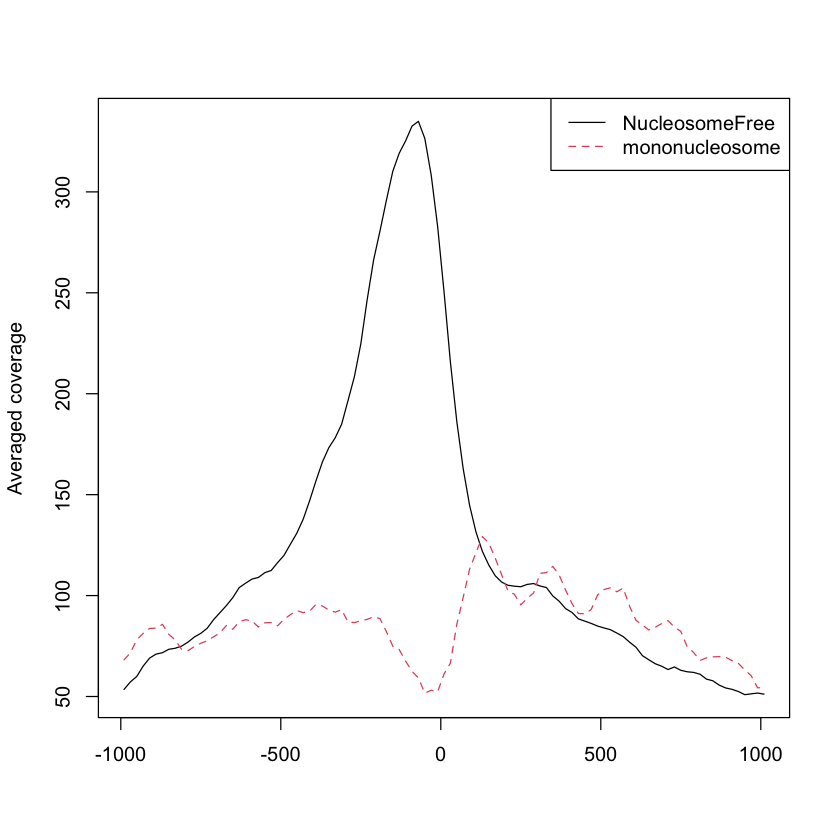

In [109]:
# We can now calculate signal distribution at TSS:
out <- featureAlignedDistribution(sigs,
                                  reCenterPeaks(TSS, width=ups+dws),
                                  zeroAt=.5, n.tile=NTILE, type="l",
                                  ylab="Averaged coverage")

## rescale the nucleosome-free and nucleosome signals to 0~1 for plotting
range01 <- function(x){(x-min(x))/(max(x)-min(x))}
out <- apply(out, 2, range01)

In [110]:
fig_path = file.path(outPath, "TSSprofile_splitbam.pdf")
fig_path

[1] "../bam_shift_alignments/ATACSeq_GFP_REP-1/chr19/TSSprofile_splitbam.pdf"

In [112]:
# And plot it:
pdf(fig_path)
        matplot(out, type="l", xaxt="n",
        xlab="Position (bp)",
        ylab="Fraction of signal")
        axis(1, at=seq(0, 100, by=10)+1,
     labels=c("-1K", seq(-800, 800, by=200), "1K"), las=2)
        abline(v=seq(0, 100, by=10)+1, lty=2, col="gray")
dev.off()

pdf 
  2

结果如下

![](demo/TSSprofile.jpg)



### calculate TSS score manually use python
> python kernel used

In [64]:
from glob import glob
import pandas as pd

In [65]:
ls = []
for path in sorted(glob('../count_table/*')):
    df = pd.read_csv(path, header=None, sep='\t', engine='python')
    # print(df)
    name = path.split('/')[-1].split('ATACSeq_')[-1].split('.TSS')[0]
    # print(name)
    df['sample'] = name
    ls.append(df)
# ls

In [66]:
df = pd.concat(ls)
df.columns = ['chrom', 'tss_up_2k', 'tss_down_2k', 'name', 'tss', 'strand', 'region_count', 'sample']
df

,chrom,tss_up_2k,tss_down_2k,name,tss,strand,region_count,sample
0,chr1,63418,67418,NM_001005484,65418,+,24,GFP-NLS_REP-1
1,chr1,449678,453678,NM_001005221,451678,-,47,GFP-NLS_REP-1
2,chr1,684654,688654,NM_001005277,686654,-,40,GFP-NLS_REP-1
3,chr1,921922,925922,NM_001385641,923922,+,525,GFP-NLS_REP-1
4,chr1,923730,927730,NM_152486,925730,+,500,GFP-NLS_REP-1
...,...,...,...,...,...,...,...,...
28009,chrY,24811393,24815393,NM_020364,24813393,-,0,test
28010,chrY,24831819,24835819,NM_020420,24833819,+,0,test
28011,chrY,24831918,24835918,NM_001388484,24833918,+,0,test
28012,chrY,25050104,25054104,NM_001002761,25052104,-,0,test


In [67]:
df_qc2 = pd.read_csv('../qc/MappingQC_result_pre.csv', index_col=0).reset_index(names='sample')
df_qc2

,sample,total reads (M),map to chrM (M),total reads remove chrM (M),map to genome (M),map to genome remove duplicates (M),total reads unmapped (M),map to plasmid (M),% chrM_map_ratio,% map_ratio,% map_ratio_rmdup,% map to plasmid
0,GFP-NLS_REP-1,155.008,35.973,118.993,30.697,28.781,88.244,37.851,23.2,19.8,18.6,24.4
1,GFP_REP-1,146.571,49.082,97.426,27.326,24.925,70.054,31.418,33.5,18.6,17.0,21.4
2,ND6-DddAwt_REP-1,116.581,41.641,74.891,27.388,24.676,47.415,10.319,35.7,23.5,21.2,8.9
3,ND6-DddAwt_REP-2,144.002,44.659,99.295,36.047,32.489,63.131,15.483,31.0,25.0,22.6,10.8
4,SIRT6-DddA11_REP-1,116.016,41.318,74.650,29.778,27.194,44.825,6.283,35.6,25.7,23.4,5.4
5,SIRT6-DddA11_REP-2,116.580,38.287,78.251,29.383,26.968,48.829,7.585,32.8,25.2,23.1,6.5
6,test,NaN,NaN,NaN,NaN,NaN,0.029,0.013,NaN,NaN,NaN,NaN


In [73]:
df_genome_coverage = df_qc2.set_index('sample')['map to genome remove duplicates (M)'].reset_index()
df_genome_coverage.columns = ['sample', 'reads']
df_genome_coverage

,sample,reads
0,GFP-NLS_REP-1,28.781
1,GFP_REP-1,24.925
2,ND6-DddAwt_REP-1,24.676
3,ND6-DddAwt_REP-2,32.489
4,SIRT6-DddA11_REP-1,27.194
5,SIRT6-DddA11_REP-2,26.968
6,test,NaN


In [74]:
df_genome_coverage['coverage'] = df_genome_coverage['reads'] * 150 * 1_000_000 / 2.7e9
df_genome_coverage

,sample,reads,coverage
0,GFP-NLS_REP-1,28.781,1.598944
1,GFP_REP-1,24.925,1.384722
2,ND6-DddAwt_REP-1,24.676,1.370889
3,ND6-DddAwt_REP-2,32.489,1.804944
4,SIRT6-DddA11_REP-1,27.194,1.510778
5,SIRT6-DddA11_REP-2,26.968,1.498222
6,test,NaN,NaN


In [75]:
df_g = df.groupby('sample').sum('region_count').reset_index()
df_g

,sample,tss_up_2k,tss_down_2k,tss,region_count
0,GFP-NLS_REP-1,2090374201289,2090486257289,2090430229289,8911039
1,GFP_REP-1,2090374201289,2090486257289,2090430229289,5919631
2,ND6-DddAwt_REP-1,2090374201289,2090486257289,2090430229289,4878993
3,ND6-DddAwt_REP-2,2090374201289,2090486257289,2090430229289,5870678
4,SIRT6-DddA11_REP-1,2090374201289,2090486257289,2090430229289,4847581
5,SIRT6-DddA11_REP-2,2090374201289,2090486257289,2090430229289,4814917
6,test,2090374201289,2090486257289,2090430229289,3153


In [76]:
df_n = df.groupby('sample').count().reset_index()
df_n

,sample,chrom,tss_up_2k,tss_down_2k,name,tss,strand,region_count
0,GFP-NLS_REP-1,28014,28014,28014,28014,28014,28014,28014
1,GFP_REP-1,28014,28014,28014,28014,28014,28014,28014
2,ND6-DddAwt_REP-1,28014,28014,28014,28014,28014,28014,28014
3,ND6-DddAwt_REP-2,28014,28014,28014,28014,28014,28014,28014
4,SIRT6-DddA11_REP-1,28014,28014,28014,28014,28014,28014,28014
5,SIRT6-DddA11_REP-2,28014,28014,28014,28014,28014,28014,28014
6,test,28014,28014,28014,28014,28014,28014,28014


In [77]:
df_g['tss_coverage'] = df_g['region_count'] * 150 / (4000 * df_n['region_count'][0])

In [78]:
df_g

,sample,tss_up_2k,tss_down_2k,tss,region_count,tss_coverage
0,GFP-NLS_REP-1,2090374201289,2090486257289,2090430229289,8911039,11.928463
1,GFP_REP-1,2090374201289,2090486257289,2090430229289,5919631,7.924115
2,ND6-DddAwt_REP-1,2090374201289,2090486257289,2090430229289,4878993,6.531100
3,ND6-DddAwt_REP-2,2090374201289,2090486257289,2090430229289,5870678,7.858586
4,SIRT6-DddA11_REP-1,2090374201289,2090486257289,2090430229289,4847581,6.489051
5,SIRT6-DddA11_REP-2,2090374201289,2090486257289,2090430229289,4814917,6.445327
6,test,2090374201289,2090486257289,2090430229289,3153,0.004221


In [79]:
df1 = df_g[['tss_coverage', 'sample']].set_index('sample')
df1.columns = ['coverage']
df1

,coverage
sample,
GFP-NLS_REP-1,11.928463
GFP_REP-1,7.924115
ND6-DddAwt_REP-1,6.531100
ND6-DddAwt_REP-2,7.858586
SIRT6-DddA11_REP-1,6.489051
SIRT6-DddA11_REP-2,6.445327
test,0.004221


In [80]:
df2 = df_genome_coverage[['coverage', 'sample']].set_index('sample')
df2.columns = ['coverage']
df2

,coverage
sample,
GFP-NLS_REP-1,1.598944
GFP_REP-1,1.384722
ND6-DddAwt_REP-1,1.370889
ND6-DddAwt_REP-2,1.804944
SIRT6-DddA11_REP-1,1.510778
SIRT6-DddA11_REP-2,1.498222
test,NaN


#### TSS score (fold change: tss / genome-bg)

In [81]:
df_res1 = (df1 / df2).reset_index()
df_res1.columns = ['sample', 'TSS score (fold change)']
df_res1.set_index('sample', inplace=True)
df_res1

,TSS score (fold change)
sample,
GFP-NLS_REP-1,7.460211
GFP_REP-1,5.722531
ND6-DddAwt_REP-1,4.764135
ND6-DddAwt_REP-2,4.353921
SIRT6-DddA11_REP-1,4.295173
SIRT6-DddA11_REP-2,4.301983
test,NaN


#### TSS score (sequencing reads percentage: %tss reads in all reads)

In [82]:
df_res2 = (df.groupby('sample')['region_count'].sum() / (df_genome_coverage.set_index('sample')['reads'] * 1_000_000) * 100).reset_index()
df_res2

,sample,0
0,GFP-NLS_REP-1,30.961534
1,GFP_REP-1,23.749773
2,ND6-DddAwt_REP-1,19.772220
3,ND6-DddAwt_REP-2,18.069741
4,SIRT6-DddA11_REP-1,17.825921
5,SIRT6-DddA11_REP-2,17.854186
6,test,NaN


In [83]:
df_res2.columns = ['sample', 'TSS score (percentage)']
df_res2.set_index('sample', inplace=True)
df_res2

,TSS score (percentage)
sample,
GFP-NLS_REP-1,30.961534
GFP_REP-1,23.749773
ND6-DddAwt_REP-1,19.772220
ND6-DddAwt_REP-2,18.069741
SIRT6-DddA11_REP-1,17.825921
SIRT6-DddA11_REP-2,17.854186
test,NaN


In [86]:
df_qc2.set_index('sample', inplace=True)

In [87]:
df_qc2

,total reads (M),map to chrM (M),total reads remove chrM (M),map to genome (M),map to genome remove duplicates (M),total reads unmapped (M),map to plasmid (M),% chrM_map_ratio,% map_ratio,% map_ratio_rmdup,% map to plasmid
sample,,,,,,,,,,,
GFP-NLS_REP-1,155.008,35.973,118.993,30.697,28.781,88.244,37.851,23.2,19.8,18.6,24.4
GFP_REP-1,146.571,49.082,97.426,27.326,24.925,70.054,31.418,33.5,18.6,17.0,21.4
ND6-DddAwt_REP-1,116.581,41.641,74.891,27.388,24.676,47.415,10.319,35.7,23.5,21.2,8.9
ND6-DddAwt_REP-2,144.002,44.659,99.295,36.047,32.489,63.131,15.483,31.0,25.0,22.6,10.8
SIRT6-DddA11_REP-1,116.016,41.318,74.650,29.778,27.194,44.825,6.283,35.6,25.7,23.4,5.4
SIRT6-DddA11_REP-2,116.580,38.287,78.251,29.383,26.968,48.829,7.585,32.8,25.2,23.1,6.5
test,NaN,NaN,NaN,NaN,NaN,0.029,0.013,NaN,NaN,NaN,NaN


In [93]:
df_final = pd.concat([df_qc2, df_res1, df_res2], axis=1, ignore_index=False)
df_final

,total reads (M),map to chrM (M),total reads remove chrM (M),map to genome (M),map to genome remove duplicates (M),total reads unmapped (M),map to plasmid (M),% chrM_map_ratio,% map_ratio,% map_ratio_rmdup,% map to plasmid,TSS score (fold change),TSS score (percentage)
sample,,,,,,,,,,,,,
GFP-NLS_REP-1,155.008,35.973,118.993,30.697,28.781,88.244,37.851,23.2,19.8,18.6,24.4,7.460211,30.961534
GFP_REP-1,146.571,49.082,97.426,27.326,24.925,70.054,31.418,33.5,18.6,17.0,21.4,5.722531,23.749773
ND6-DddAwt_REP-1,116.581,41.641,74.891,27.388,24.676,47.415,10.319,35.7,23.5,21.2,8.9,4.764135,19.772220
ND6-DddAwt_REP-2,144.002,44.659,99.295,36.047,32.489,63.131,15.483,31.0,25.0,22.6,10.8,4.353921,18.069741
SIRT6-DddA11_REP-1,116.016,41.318,74.650,29.778,27.194,44.825,6.283,35.6,25.7,23.4,5.4,4.295173,17.825921
SIRT6-DddA11_REP-2,116.580,38.287,78.251,29.383,26.968,48.829,7.585,32.8,25.2,23.1,6.5,4.301983,17.854186
test,NaN,NaN,NaN,NaN,NaN,0.029,0.013,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
df_final.to_csv('../qc/MappingQC_result_final.csv')

# [for backup] prepare for snakemake.step2 count table
生成下表的代码，一般不用重跑此步骤
"ref_data/hg38_ucsc_refseq_NM_TSS_extend2kb.sorted.bed"

此表供step2 中计算TSS region count-table的时候使用


In [95]:
# data from ucsc table browser
df_tss = pd.read_csv('ref_data/hg38_tb_ncbiRefSeq_bed_wholeGene.bed.gz', sep='\t', header=None, usecols=[0, 1, 2, 3, 4, 5], names=['chrom', 'start', 'end', 'name', 'score', 'strand'])
df_tss

,chrom,start,end,name,score,strand
0,chr1,67092164,67109072,XM_011541469.2,0,-
1,chr1,67092164,67131227,XM_017001276.2,0,-
2,chr1,67092164,67131227,XM_011541467.2,0,-
3,chr1,67092164,67134970,NM_001276352.2,0,-
4,chr1,67092164,67134970,NM_001276351.2,0,-
...,...,...,...,...,...,...
195295,chr22_KI270733v1_random,125930,127799,NR_146119.1,0,+
195296,chr22_KI270733v1_random,128876,129032,NR_146120.1,0,+
195297,chr22_KI270733v1_random,137952,140657,XR_951367.3,0,+
195298,chr22_KI270733v1_random,140978,143466,XR_001756152.2,0,+


In [96]:
def calculate_tss(x):
    if x['strand'] == '+':
        return x['start']
    elif x['strand'] == '-':
        return x['end']
    else:
        raise ValueError

df_tss['tss'] = df_tss.apply(calculate_tss, axis=1)
df_tss

,chrom,start,end,name,score,strand,tss
0,chr1,67092164,67109072,XM_011541469.2,0,-,67109072
1,chr1,67092164,67131227,XM_017001276.2,0,-,67131227
2,chr1,67092164,67131227,XM_011541467.2,0,-,67131227
3,chr1,67092164,67134970,NM_001276352.2,0,-,67134970
4,chr1,67092164,67134970,NM_001276351.2,0,-,67134970
...,...,...,...,...,...,...,...
195295,chr22_KI270733v1_random,125930,127799,NR_146119.1,0,+,125930
195296,chr22_KI270733v1_random,128876,129032,NR_146120.1,0,+,128876
195297,chr22_KI270733v1_random,137952,140657,XR_951367.3,0,+,137952
195298,chr22_KI270733v1_random,140978,143466,XR_001756152.2,0,+,140978


In [97]:
df_tss['tss_up_2k'] = df_tss['tss'] - 2000
df_tss['tss_down_2k'] = df_tss['tss'] + 2000
df_tss

,chrom,start,end,name,score,strand,tss,tss_up_2k,tss_down_2k
0,chr1,67092164,67109072,XM_011541469.2,0,-,67109072,67107072,67111072
1,chr1,67092164,67131227,XM_017001276.2,0,-,67131227,67129227,67133227
2,chr1,67092164,67131227,XM_011541467.2,0,-,67131227,67129227,67133227
3,chr1,67092164,67134970,NM_001276352.2,0,-,67134970,67132970,67136970
4,chr1,67092164,67134970,NM_001276351.2,0,-,67134970,67132970,67136970
...,...,...,...,...,...,...,...,...,...
195295,chr22_KI270733v1_random,125930,127799,NR_146119.1,0,+,125930,123930,127930
195296,chr22_KI270733v1_random,128876,129032,NR_146120.1,0,+,128876,126876,130876
195297,chr22_KI270733v1_random,137952,140657,XR_951367.3,0,+,137952,135952,139952
195298,chr22_KI270733v1_random,140978,143466,XR_001756152.2,0,+,140978,138978,142978


In [98]:
df_tss = df_tss[['chrom', 'tss_up_2k', 'tss_down_2k', 'name', 'tss', 'strand']].copy()
df_tss

,chrom,tss_up_2k,tss_down_2k,name,tss,strand
0,chr1,67107072,67111072,XM_011541469.2,67109072,-
1,chr1,67129227,67133227,XM_017001276.2,67131227,-
2,chr1,67129227,67133227,XM_011541467.2,67131227,-
3,chr1,67132970,67136970,NM_001276352.2,67134970,-
4,chr1,67132970,67136970,NM_001276351.2,67134970,-
...,...,...,...,...,...,...
195295,chr22_KI270733v1_random,123930,127930,NR_146119.1,125930,+
195296,chr22_KI270733v1_random,126876,130876,NR_146120.1,128876,+
195297,chr22_KI270733v1_random,135952,139952,XR_951367.3,137952,+
195298,chr22_KI270733v1_random,138978,142978,XR_001756152.2,140978,+


In [99]:
df_tss = df_tss[df_tss['name'].str.startswith('NM')].copy()
df_tss = df_tss[df_tss['chrom'].map(lambda x: '_' not in x)].copy()
df_tss = df_tss.sort_values(['chrom', 'tss_up_2k', 'tss_down_2k'])
df_tss

,chrom,tss_up_2k,tss_down_2k,name,tss,strand
6396,chr1,63418,67418,NM_001005484.2,65418,+
6425,chr1,449678,453678,NM_001005221.2,451678,-
6435,chr1,684654,688654,NM_001005277.1,686654,-
6450,chr1,921922,925922,NM_001385641.1,923922,+
6451,chr1,921922,925922,NM_001385640.1,923922,+
...,...,...,...,...,...,...
94907,chrY,57065864,57069864,NM_001145149.3,57067864,+
94908,chrY,57065864,57069864,NM_001185183.2,57067864,+
94909,chrY,57065864,57069864,NM_005638.6,57067864,+
94924,chrY,57182215,57186215,NM_002186.3,57184215,+


In [100]:
ls_sort_keys = [f'chr{i}' for i in list(range(1, 23)) + ['X', 'Y', 'M']]
ls_sort_keys

['chr1',
 'chr2',
 'chr3',
 'chr4',
 'chr5',
 'chr6',
 'chr7',
 'chr8',
 'chr9',
 'chr10',
 'chr11',
 'chr12',
 'chr13',
 'chr14',
 'chr15',
 'chr16',
 'chr17',
 'chr18',
 'chr19',
 'chr20',
 'chr21',
 'chr22',
 'chrX',
 'chrY',
 'chrM']

In [101]:
df_sorted = pd.DataFrame({'chrom': ls_sort_keys, 'sort_key': range(25)})
df_sorted

,chrom,sort_key
0,chr1,0
1,chr2,1
2,chr3,2
3,chr4,3
4,chr5,4
5,chr6,5
6,chr7,6
7,chr8,7
8,chr9,8
9,chr10,9


In [102]:
df_tss = df_tss.merge(df_sorted)

df_tss = df_tss.sort_values(['sort_key', 'tss_up_2k', 'tss_down_2k'])
df_tss['name'] = df_tss['name'].str.split('.').str[0]
df_tss

,chrom,tss_up_2k,tss_down_2k,name,tss,strand,sort_key
0,chr1,63418,67418,NM_001005484,65418,+,0
1,chr1,449678,453678,NM_001005221,451678,-,0
2,chr1,684654,688654,NM_001005277,686654,-,0
3,chr1,921922,925922,NM_001385641,923922,+,0
4,chr1,921922,925922,NM_001385640,923922,+,0
...,...,...,...,...,...,...,...
66749,chrY,57065864,57069864,NM_001145149,57067864,+,23
66750,chrY,57065864,57069864,NM_001185183,57067864,+,23
66751,chrY,57065864,57069864,NM_005638,57067864,+,23
66752,chrY,57182215,57186215,NM_002186,57184215,+,23


In [103]:
df_tss.chrom.unique()

array(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8',
       'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22',
       'chrX', 'chrY'], dtype=object)

In [104]:
df_tss

,chrom,tss_up_2k,tss_down_2k,name,tss,strand,sort_key
0,chr1,63418,67418,NM_001005484,65418,+,0
1,chr1,449678,453678,NM_001005221,451678,-,0
2,chr1,684654,688654,NM_001005277,686654,-,0
3,chr1,921922,925922,NM_001385641,923922,+,0
4,chr1,921922,925922,NM_001385640,923922,+,0
...,...,...,...,...,...,...,...
66749,chrY,57065864,57069864,NM_001145149,57067864,+,23
66750,chrY,57065864,57069864,NM_001185183,57067864,+,23
66751,chrY,57065864,57069864,NM_005638,57067864,+,23
66752,chrY,57182215,57186215,NM_002186,57184215,+,23


In [105]:
df_tss = df_tss.drop_duplicates(subset=['name'], keep='first')
df_tss = df_tss.drop_duplicates(subset=['chrom', 'tss_up_2k', 'tss_down_2k'], keep='first')
df_tss

,chrom,tss_up_2k,tss_down_2k,name,tss,strand,sort_key
0,chr1,63418,67418,NM_001005484,65418,+,0
1,chr1,449678,453678,NM_001005221,451678,-,0
2,chr1,684654,688654,NM_001005277,686654,-,0
3,chr1,921922,925922,NM_001385641,923922,+,0
5,chr1,923730,927730,NM_152486,925730,+,0
...,...,...,...,...,...,...,...
66738,chrY,24811393,24815393,NM_020364,24813393,-,23
66739,chrY,24831819,24835819,NM_020420,24833819,+,23
66741,chrY,24831918,24835918,NM_001388484,24833918,+,23
66742,chrY,25050104,25054104,NM_001002761,25052104,-,23


In [106]:
df_tss = df_tss[['chrom', 'tss_up_2k', 'tss_down_2k', 'name', 'tss', 'strand']].copy()
df_tss

,chrom,tss_up_2k,tss_down_2k,name,tss,strand
0,chr1,63418,67418,NM_001005484,65418,+
1,chr1,449678,453678,NM_001005221,451678,-
2,chr1,684654,688654,NM_001005277,686654,-
3,chr1,921922,925922,NM_001385641,923922,+
5,chr1,923730,927730,NM_152486,925730,+
...,...,...,...,...,...,...
66738,chrY,24811393,24815393,NM_020364,24813393,-
66739,chrY,24831819,24835819,NM_020420,24833819,+
66741,chrY,24831918,24835918,NM_001388484,24833918,+
66742,chrY,25050104,25054104,NM_001002761,25052104,-


In [107]:
df_tss.to_csv('ref_data/hg38_ucsc_refseq_NM_TSS_extend2kb.sorted.bed', header=False, index=False, sep='\t')